In [27]:
import matplotlib.pyplot as plt
import os
import PIL as pil
import pypdfium2 as pdfium
import seaborn as sns

In [10]:
BASE_DIR = "/Users/dbchristenson/Desktop/python/bab-aat/bab-aat"
pdf_data = os.path.join(BASE_DIR, "data", "olombendo_raw_pdf")

```
import pypdfium2 as pdfium

# Open the PDF document
pdf = pdfium.PdfDocument("path/to/your/document.pdf")

# Select the first page (0-indexed)
page = pdf.get_page(0)

# Render the page to a PIL Image.
# The scale parameter can be adjusted to control the output resolution.
pil_image = page.render_topil(scale=2)

# Save the image to a file
pil_image.save("output.png")

# Close the page and the document to free resources
page.close()
pdf.close()

```

<Axes: ylabel='count'>

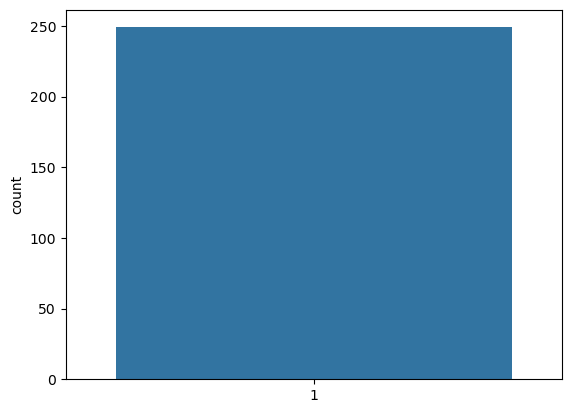

In [ ]:
pdf_files = [f for f in os.listdir(pdf_data) if f.endswith(".pdf")]

page_counts = []

for f in pdf_files:
    pdf = pdfium.PdfDocument(os.path.join(pdf_data, f))

    num_pages = len(pdf)

    page_counts.append(num_pages)

sns.countplot(x=page_counts)

In [26]:
# all pdf samples have 1 page so we will assume all workable future pdfs will have 1 page
test_pdf = pdfium.PdfDocument(os.path.join(pdf_data, pdf_files[0]))
test_page = test_pdf[0]

POINT_CONVERSATION_CONSTANT = 1/72  #1 point = 1/72 inch
w, h = test_page.get_size()
w_inch, h_inch = w * POINT_CONVERSATION_CONSTANT, h * POINT_CONVERSATION_CONSTANT


print(f"Width: {w}, Height: {h}")
print(f"Width in inches: {w_inch}, Height in inches: {h_inch}")

Width: 841.8900146484375, Height: 1190.550048828125
Width in inches: 11.692916870117188, Height in inches: 16.535417344835068


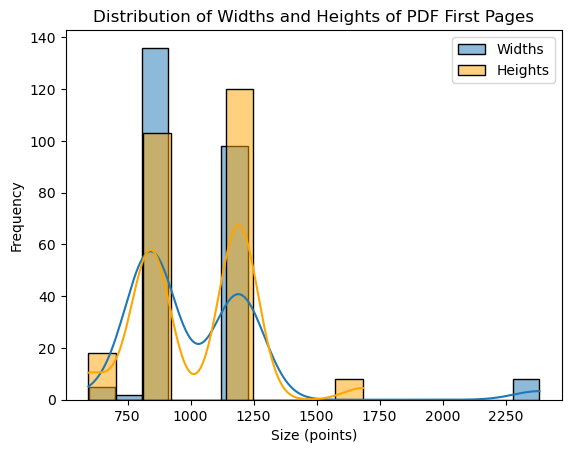

In [28]:
widths = []
heights = []

for pdf_file in pdf_files:
    pdf = pdfium.PdfDocument(os.path.join(pdf_data, pdf_file))
    page = pdf[0]
    w, h = page.get_size()
    widths.append(w)
    heights.append(h)
    page.close()
    pdf.close()

sns.histplot(widths, kde=True, label='Widths')
sns.histplot(heights, kde=True, label='Heights', color='orange')
plt.legend()
plt.xlabel('Size (points)')
plt.ylabel('Frequency')
plt.title('Distribution of Widths and Heights of PDF First Pages')
plt.show()